In [1]:
import numpy as np
import pandas as pd
import math
import string
import scipy as sci

from time import time
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [65]:
dictionary = set()

with open('dictionary_actual_game.txt', 'r') as file:
    for word in file.read().splitlines():
        dictionary.add(word)
        
dictionary_df = pd.read_csv("dictionary_df2.csv")
dictionary_df.loc[160413, "word"] = "null"
dictionary_df.loc[154353, "word"] = "nan"
dictionary_df = dictionary_df[dictionary_df.columns[1:]]
score_dict = dict(zip(dictionary_df["word"], dictionary_df["score"]))

In [122]:
%%time
longword_dictionary = set()

for word in dictionary:
    if len(word) >= 14:
        longword_dictionary.add(word)

CPU times: user 58.9 ms, sys: 3.38 ms, total: 62.3 ms
Wall time: 62.6 ms


# Maximum length of the words in the dictionary 

In [3]:
%%time
length_set = set()
for word in dictionary:
    length_set.add(len(word))
    
max(length_set)

CPU times: user 56.9 ms, sys: 2.25 ms, total: 59.1 ms
Wall time: 58.2 ms


25

# Distribution of word length in the dictionary

In [4]:
%%time
length_lst = []
for word in dictionary:
    length_lst.append(len(word))

length_dict = {}
for i in range(3, 26):
    length_dict[i] = length_lst.count(i)

length_dict

CPU times: user 118 ms, sys: 2.83 ms, total: 121 ms
Wall time: 120 ms


{3: 1307,
 4: 5551,
 5: 12707,
 6: 22602,
 7: 33553,
 8: 40983,
 9: 40541,
 10: 35794,
 11: 28396,
 12: 20693,
 13: 14138,
 14: 9276,
 15: 5805,
 16: 3435,
 17: 1911,
 18: 1017,
 19: 530,
 20: 258,
 21: 106,
 22: 43,
 23: 24,
 24: 15,
 25: 3}

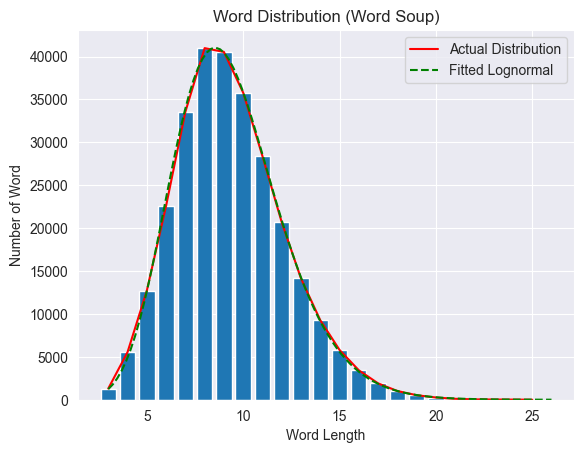

In [108]:
plt.figure();
plt.bar(length_dict.keys(), length_dict.values());
plt.plot(length_dict.keys(), length_dict.values(), '-', color="red", label="Actual Distribution");
plt.xlabel("Word Length");
plt.ylabel("Number of Word");
plt.title("Word Distribution (Word Soup)");
shape, loc, scale = sci.stats.lognorm.fit(length_lst)
x=np.linspace(3,26,100)
pdf_fitted = sci.stats.lognorm.pdf(x, shape, loc=loc, scale=scale) * sum(length_dict.values())
plt.plot(x, pdf_fitted, "--", color="green", label="Fitted Lognormal");
plt.legend();
plt.savefig("Plots/WordDistribution.pdf")

In [121]:
np.quantile(length_lst, 0.95)

14.0

# Distribution of Scores of words in Word Soup dictionary

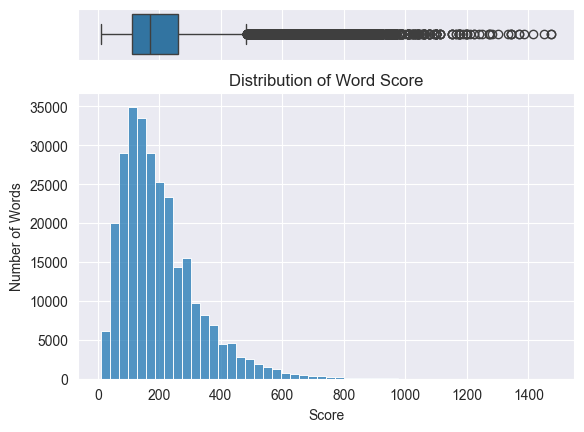

In [105]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(dictionary_df["score"], orient="h", ax=ax_box)
sns.histplot(data=dictionary_df, x="score", ax=ax_hist, bins=50)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.xlabel("Score");
plt.ylabel("Number of Words");
plt.title("Distribution of Word Score");
plt.savefig("Plots/WordScoreDistr.pdf")

In [144]:
np.median(dictionary_df["score"])

171.0

In [145]:
np.quantile(dictionary_df["score"], 0.75)

260.0

In [142]:
np.quantile(dictionary_df["score"], 0.99)

629.0

In [139]:
max(dictionary_df["score"])

1475

In [138]:
dictionary_df[dictionary_df["score"]==1475]

,word,score
115916,immunoelectrophoretically,1475


# Frequency of letters in jth location (1-25)

In [6]:
q2_lst = []
x2_lst = []
i2_lst = []
s2_lst = []
for word in dictionary:
    if word.count("q") == 2:
        q2_lst.append(word)
    if word.count("x") == 2:
        x2_lst.append(word)
    if word.count("i") == 7:
        i2_lst.append(word)
    if word.count("s") == 8:
        s2_lst.append(word)

In [7]:
s2_lst

['stresslessnesses', 'successlessnesses']

In [8]:
%%time
for j in range(25):
    globals() [f"letter{j}"] = []
    for word in dictionary:
        try:
            globals() [f"letter{j}"].append(word[j])
        except:
            continue

CPU times: user 2.82 s, sys: 10.1 ms, total: 2.83 s
Wall time: 2.85 s


In [9]:
%%time
for j in range(25):
    globals() [f"letter_occ{j}"] = {}
    for i in string.ascii_lowercase:
        globals() [f"letter_occ{j}"][i] = globals() [f"letter{j}"].count(i)

CPU times: user 714 ms, sys: 4.43 ms, total: 718 ms
Wall time: 723 ms


<timed exec>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.


CPU times: user 7.19 s, sys: 1.59 s, total: 8.78 s
Wall time: 2.98 s


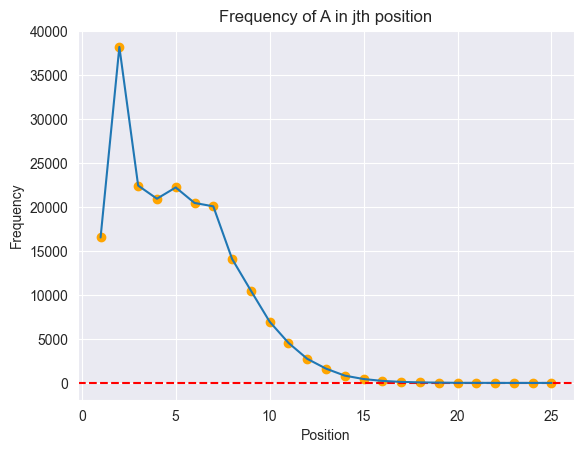

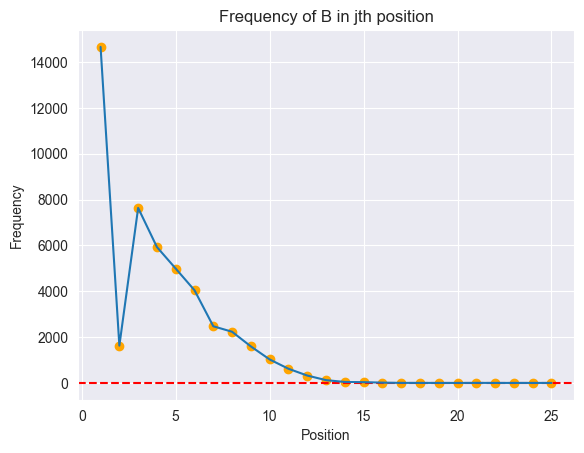

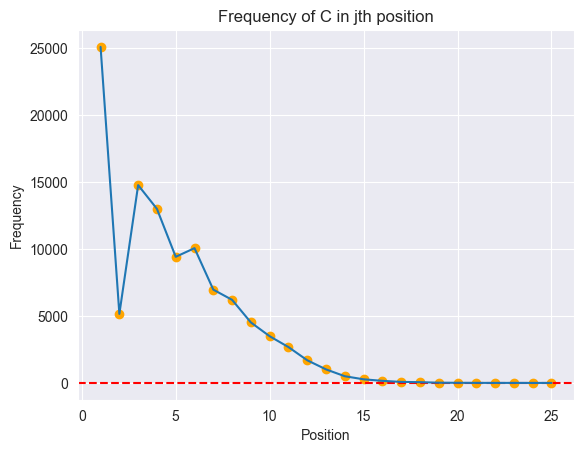

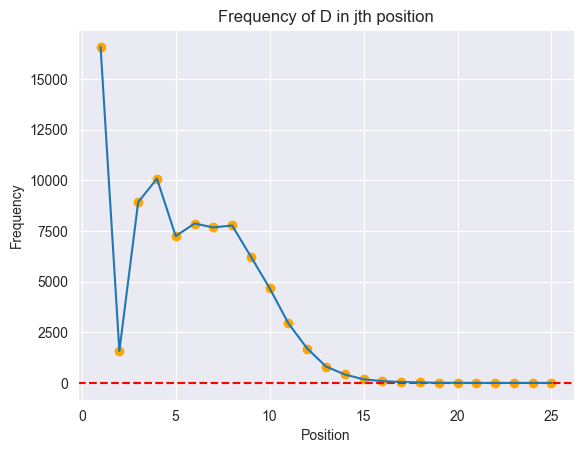

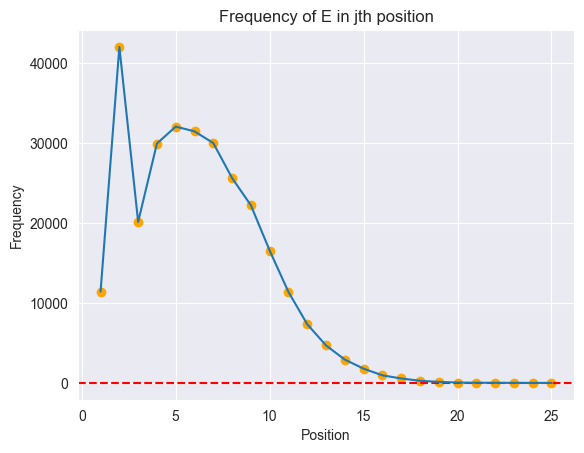

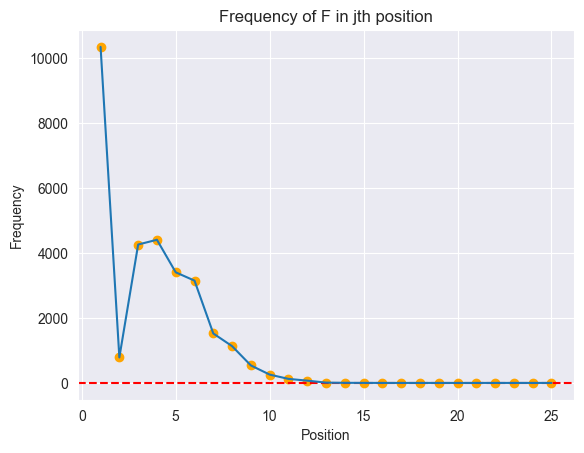

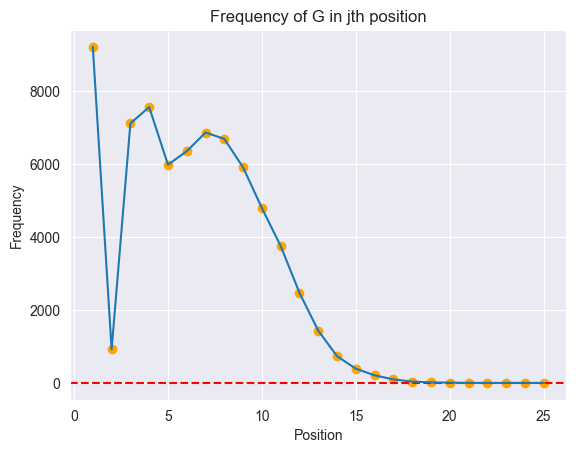

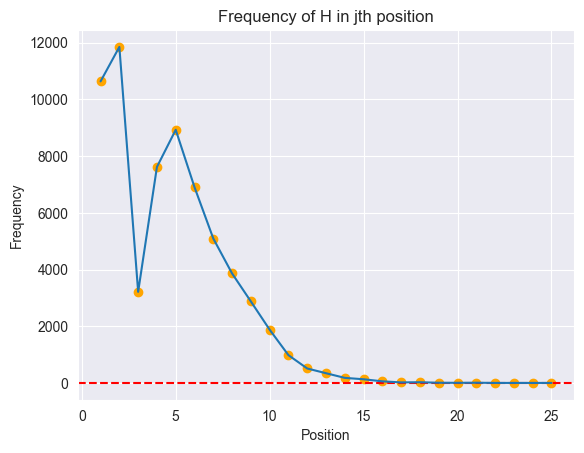

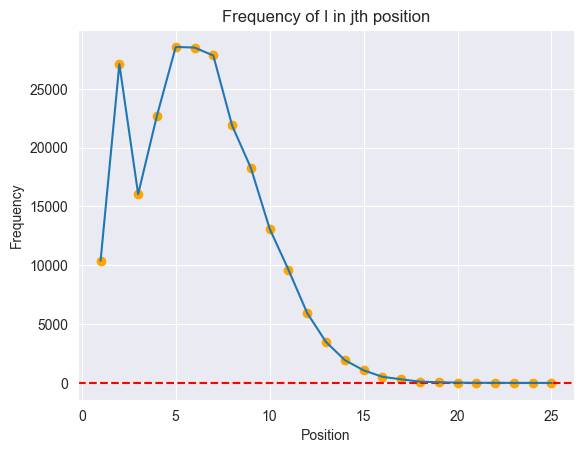

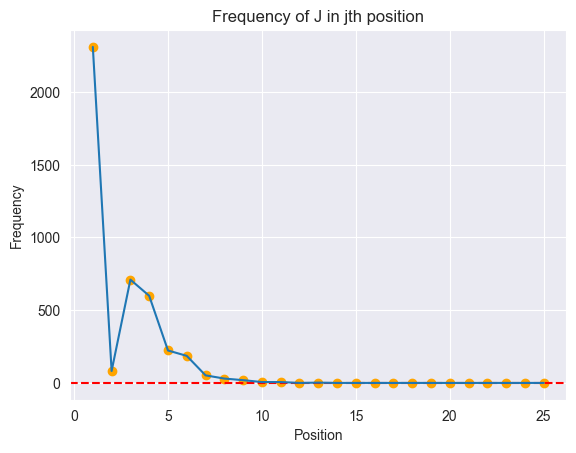

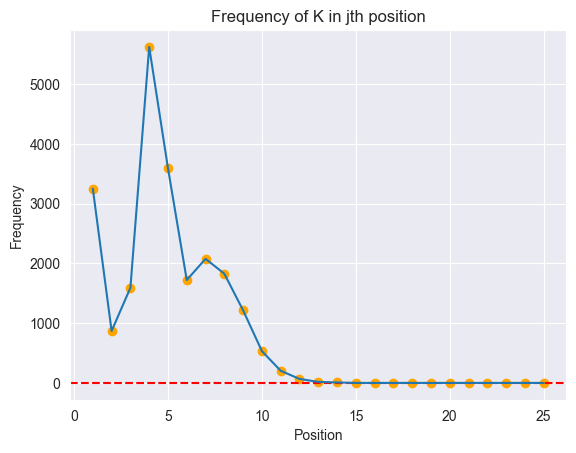

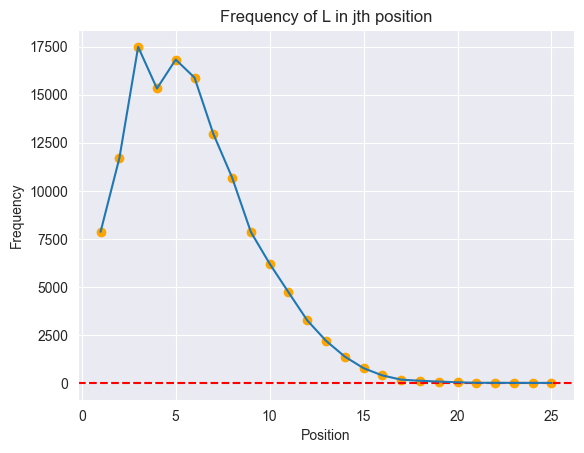

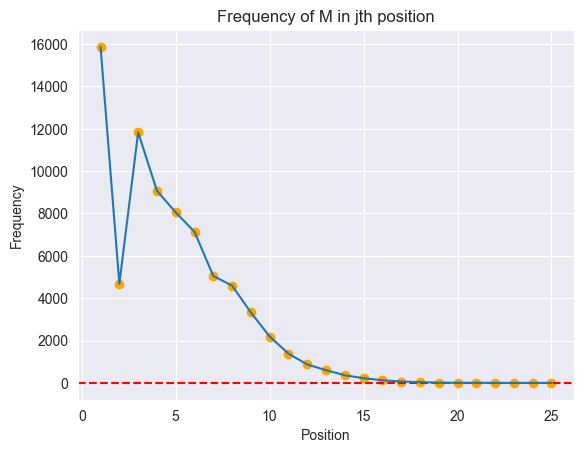

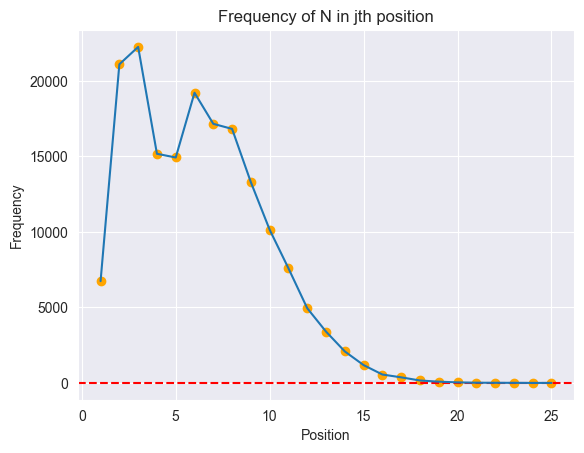

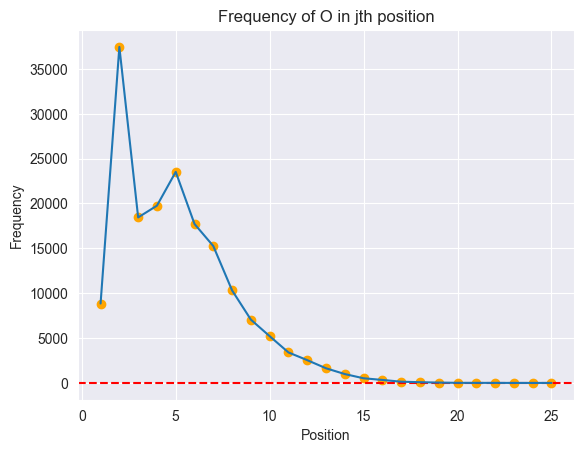

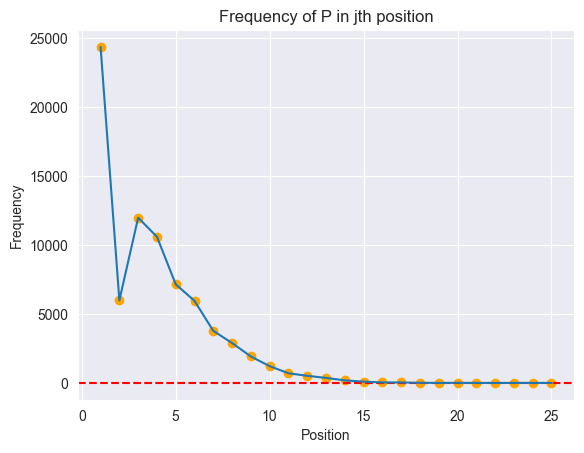

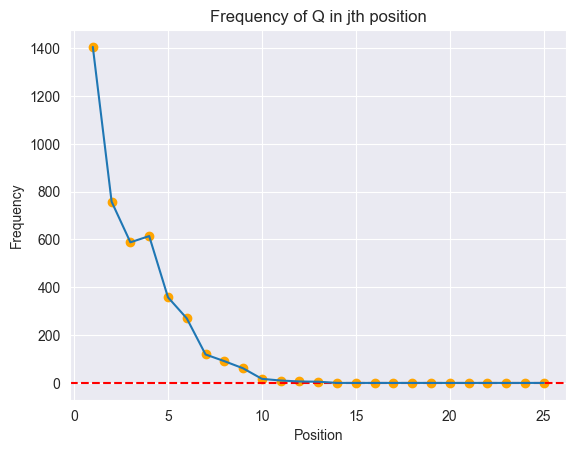

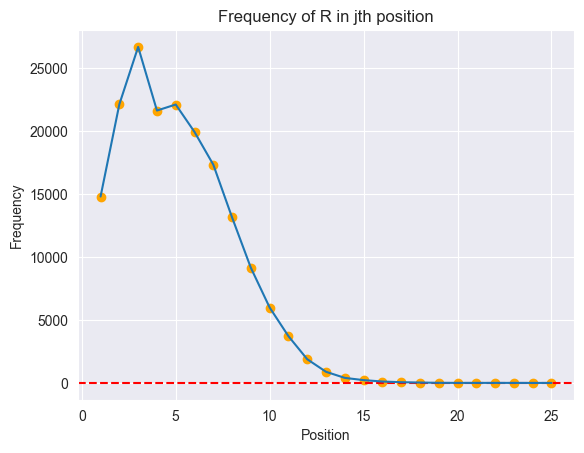

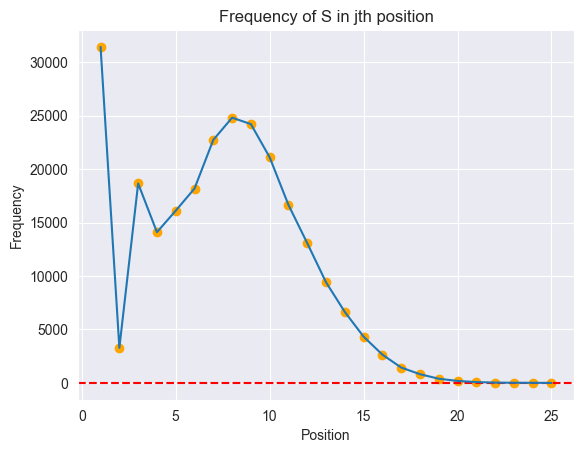

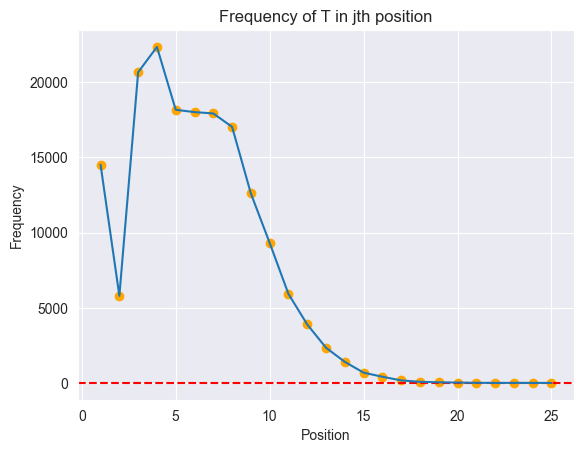

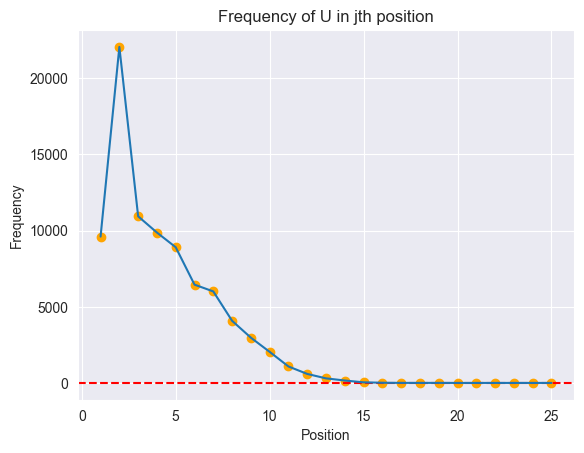

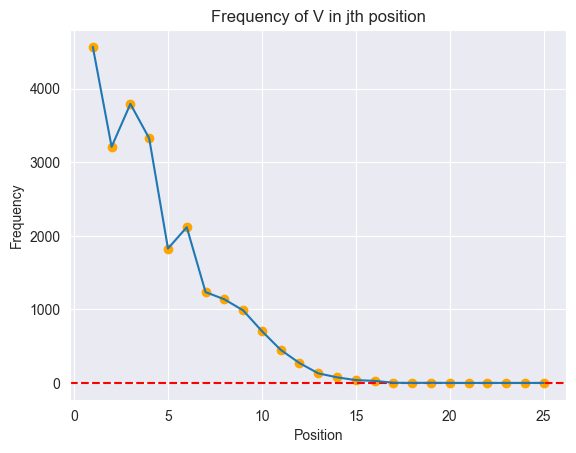

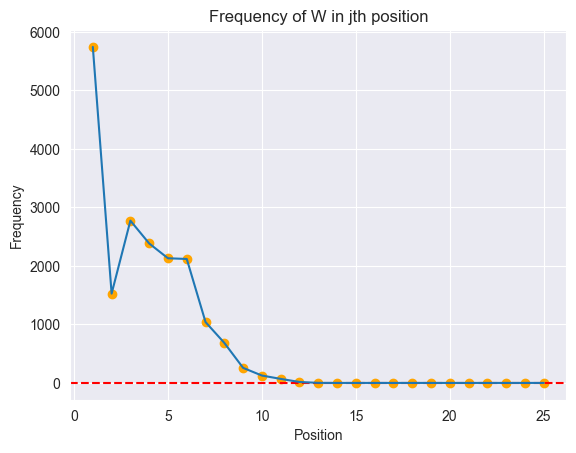

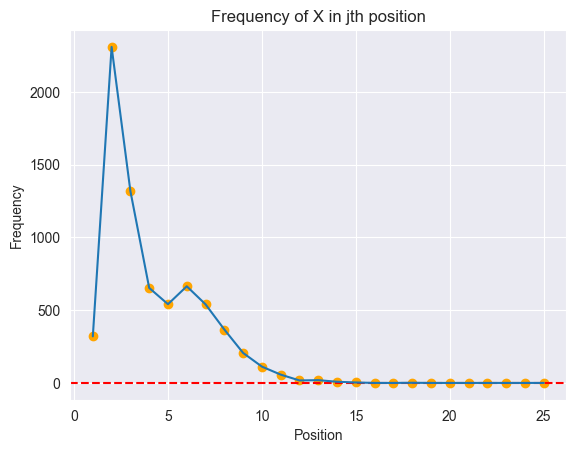

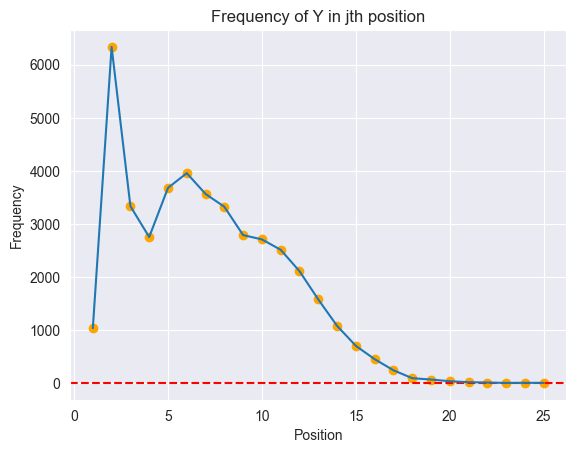

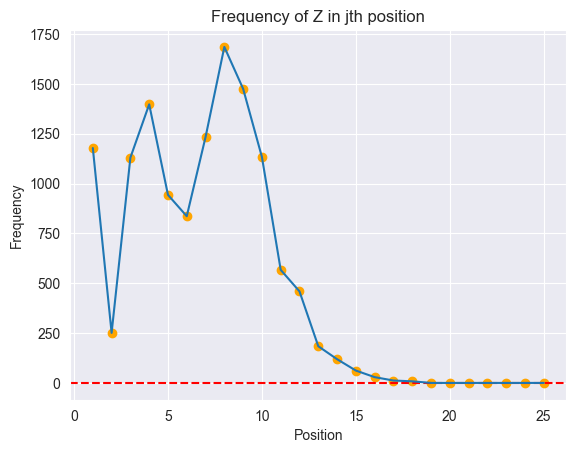

In [10]:
%%time
for i in string.ascii_lowercase:
    plt.figure();
    plt.axhline(y=0, color='r', linestyle='--');
    LO = []
    for j in range(25):
        LO.append(globals() [f"letter_occ{j}"][i])
    plt.plot(range(1, 26), LO); 
    plt.scatter(range(1, 26), LO, c="orange");
    plt.title(f"Frequency of {string.capwords(i)} in jth position");
    plt.xlabel("Position");
    plt.ylabel("Frequency");
    plt.savefig(f"Plots/frequency{i}.pdf");

# Number of Vowels (for the whole dictionary and the long words)

In [96]:
%%time
vowels_in_words = []
for word in dictionary:
    num_vowels = 0
    for v in {"a", "e", "i", "o", "u"}:
        num_vowels += word.count(v)
    if num_vowels == 0:
        print(word)
    vowels_in_words.append(num_vowels)

gyms
ply
skyr
rynd
myths
stymy
myrrh
whys
flybys
sly
skyrs
syzygy
wynn
slyly
gyny
synch
pfft
kynd
twp
gymp
cyst
lynx
tymps
psst
lymphs
sphynx
wynds
wryly
tsktsk
vly
kydst
wry
myc
psychs
hymns
nth
bys
tsk
syn
cwm
synd
gym
nymphs
ghylls
skry
scry
tryps
wyns
lyms
synchs
synds
grypt
thy
fyrd
lymph
wynns
sty
jynx
glycyl
sync
sylph
xylyl
lych
xylyls
pry
sky
cysts
typps
tygs
nymphly
lynch
tyg
tynd
pst
cwms
fry
typp
syph
mycs
shh
myrrhs
prys
syncs
hyp
crypts
synth
drys
cwtch
sny
gypsy
tryp
wyn
thymy
hmm
gyppy
tryst
skyfs
cry
byrls
hwyls
rhythms
crwths
try
rynds
wych
shyly
ympt
pygmy
cly
trysts
lym
wynd
xyst
nys
kyrgyz
rhythm
glyphs
gynny
rhy
fly
skyf
tsktsks
phpht
kynds
myth
swy
spry
glyph
flyby
crwth
gyp
hyps
gyps
glycyls
brr
ghyll
tsks
dry
gymps
psych
dryly
nymph
fyrds
tymp
spryly
pyx
sylphy
flysch
syphs
shy
brrr
xysts
typy
mythy
hymn
why
zzzs
hwyl
spy
synths
crypt
sylphs
chynd
byrl
ssh
CPU times: user 302 ms, sys: 5.69 ms, total: 307 ms
Wall time: 310 ms


In [123]:
%%time
vowels_in_longwords = []
for word in longword_dictionary:
    num_vowels = 0
    for v in {"a", "e", "i", "o", "u"}:
        num_vowels += word.count(v)
    if num_vowels == 0:
        print(word)
    vowels_in_longwords.append(num_vowels)

CPU times: user 35.4 ms, sys: 3.23 ms, total: 38.6 ms
Wall time: 54.5 ms


In [77]:
max(vowels_in_words)

12

In [78]:
vowels_in_words_dict = {}
for i in range(13):
    vowels_in_words_dict[i] = vowels_in_words.count(i)

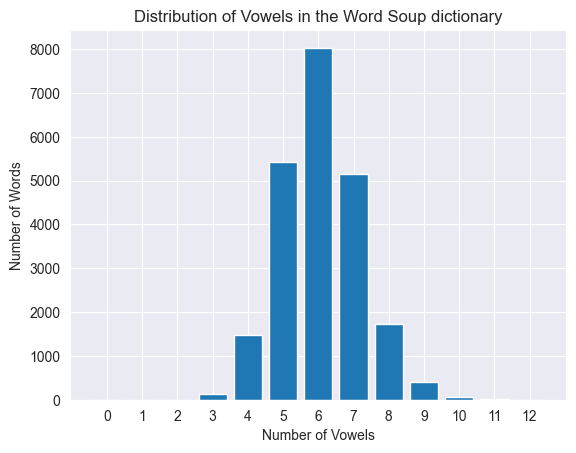

In [124]:
vowels_in_longwords_dict = {}
for i in range(13):
    vowels_in_longwords_dict[i] = vowels_in_longwords.count(i)

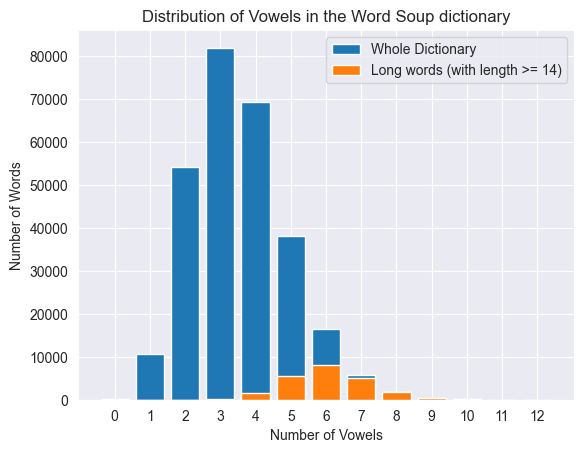

In [133]:
plt.figure();
plt.bar(vowels_in_words_dict.keys(), vowels_in_words_dict.values(), label="Whole Dictionary");
plt.bar(vowels_in_longwords_dict.keys(), vowels_in_longwords_dict.values(), label="Long words (with length >= 14)");
plt.xticks(range(13));
plt.xlabel("Number of Vowels");
plt.ylabel("Number of Words");
plt.title("Distribution of Vowels in the Word Soup dictionary");
plt.legend();
plt.savefig("Plots/distribution_vowels.pdf")

In [95]:
vowels_in_words_dict.values()

dict_values([165, 10684, 54082, 81917, 69180, 38116, 16491, 5841, 1728, 414, 62, 7, 1])

In [134]:
vowels_in_longwords_dict.values()

dict_values([0, 0, 0, 138, 1480, 5422, 8032, 5150, 1717, 414, 62, 7, 1])

# Total Frequency

J, Q, X with low frequency

In [11]:
%%time
occurrence_letter = {}
for l in string.ascii_lowercase:
    L = 0
    for word in dictionary:
        L += word.count(l)
    occurrence_letter[l] = L 

CPU times: user 1.73 s, sys: 10.7 ms, total: 1.74 s
Wall time: 1.75 s


In [12]:
occurrence_letter

{'a': 202869,
 'b': 47348,
 'c': 105126,
 'd': 84811,
 'e': 291252,
 'f': 29980,
 'g': 70576,
 'h': 65098,
 'i': 237518,
 'j': 4225,
 'k': 22578,
 'l': 135863,
 'm': 75483,
 'n': 177146,
 'o': 173267,
 'p': 77832,
 'q': 4302,
 'r': 180384,
 's': 250352,
 't': 171356,
 'u': 85085,
 'v': 23883,
 'w': 18872,
 'x': 7135,
 'y': 42321,
 'z': 12701}

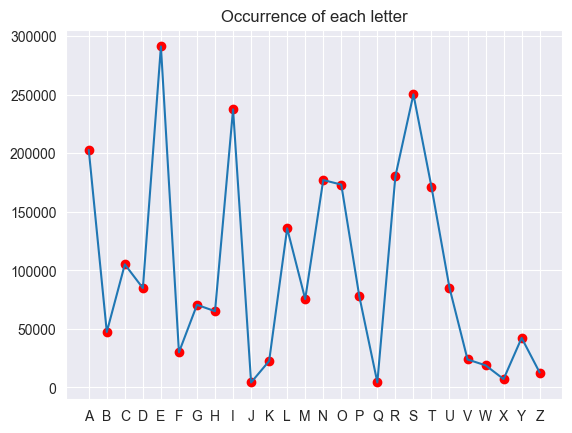

In [13]:
plt.figure();
plt.scatter(range(26), occurrence_letter.values(), c="r");
plt.plot(range(26), occurrence_letter.values());
plt.xticks(range(26), string.ascii_uppercase);
plt.title("Occurrence of each letter");
plt.savefig("Plots/occ_letter.pdf")

In [23]:
generator_prob = [76,28,30,37,112,16,26,27,51,9,24,40,32,62,88,37,11,60,66,64,39,16,18,12,22,16]
english_dictionary = [
    85108,20506,45641,42668,135371,24558,19928,39717,85248,1695,7349,46744,35381,82427,89790,26481,
    2746,77557,86114,104724,39670,13939,15028,3971,20622,1039
]

In [33]:
np.arange(1, 26)-0.3

array([ 0.7,  1.7,  2.7,  3.7,  4.7,  5.7,  6.7,  7.7,  8.7,  9.7, 10.7,
       11.7, 12.7, 13.7, 14.7, 15.7, 16.7, 17.7, 18.7, 19.7, 20.7, 21.7,
       22.7, 23.7, 24.7])

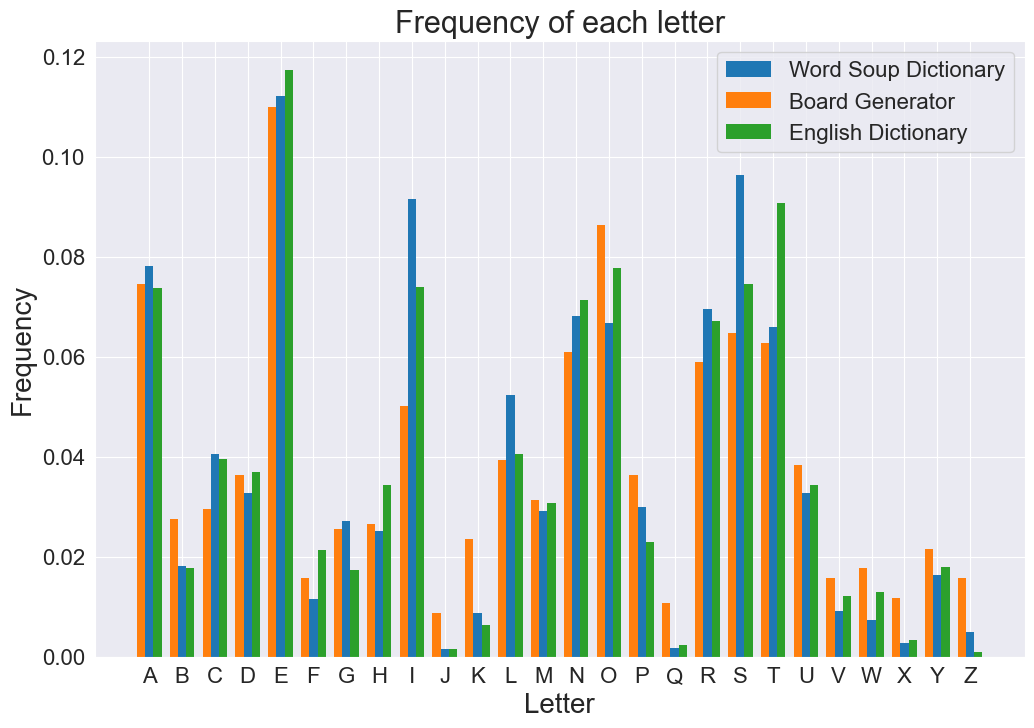

In [61]:
W = 0.25
plt.figure(figsize=(12,8));
plt.bar(range(26), np.array(list(occurrence_letter.values()))/sum(occurrence_letter.values()),
       label="Word Soup Dictionary", width=W, edgecolor="none");
plt.bar(np.arange(0, 26)-W, np.array(generator_prob)/sum(generator_prob), label="Board Generator",width=W,
        edgecolor="none");
plt.bar(np.arange(0, 26)+W, np.array(english_dictionary)/sum(english_dictionary), label="English Dictionary",width=W,
       edgecolor="none");
plt.xticks(range(26), string.ascii_uppercase, fontsize=16);
plt.yticks(fontsize=16);
plt.title("Frequency of each letter", fontsize=22);
plt.xlabel("Letter",fontsize=20);
plt.ylabel("Frequency",fontsize=20);
plt.legend(fontsize=16);
plt.savefig("Plots/frequency_letter.pdf")

# Features Extraction

In [62]:
directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1),  (1, 0), (1, 1)]

class TrieNode:
    def __init__(self):
        self.children = {}
        self.is_word = False

class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word):
        node = self.root
        for char in word:
            if char not in node.children:
                node.children[char] = TrieNode()
            node = node.children[char]
        node.is_word = True

    def search(self, word):
        node = self.root
        for char in word:
            if char not in node.children:
                return False
            node = node.children[char]
        return node.is_word

    def starts_with(self, prefix):
        node = self.root
        for char in prefix:
            if char not in node.children:
                return False
            node = node.children[char]
        return True

trie = Trie()
with open('dictionary_actual_game.txt', 'r') as file:
    for word in file.read().splitlines():
        trie.insert(word)
        
keys = list(string.ascii_lowercase)
score = [1,3,3,2,1,4,2,4,3,8,5,5,3,2,1,3,10,1,1,1,2,4,4,8,4,10]
letter_to_int = dict(zip(keys, range(1, 27)))
letter_to_int["N"] = 0

def tiles_remove(tiles, board):
    board[tiles[:, 0], tiles[:, 1]] = "N"
    return board

def gravity(board_1):
    # Gravity down
    row_index, col_index = np.where(board_1 == "N")
    indices = list(zip(row_index, col_index))
    for r, c in indices:
        column = board_1[:r + 1, c].copy()
        if r > 0:
            column[1:] = column[:-1]
            column[0] = "N"
        board_1[:r + 1, c] = column
    # Gravity right
    row_index, col_index = np.where(board_1 == "N")
    indices = list(zip(row_index, col_index))
    for r, c in indices:
        row = board_1[r, :c + 1].copy()
        if c > 0:
            row[1:] = row[:-1]
            row[0] = "N"
        board_1[r, :c + 1] = row
    return board_1

class WordSoup_state:
    def __init__(self, board, S=0, word_lst=[], depth=0):
        self.board = board
        self.score = S
        self.word_lst = word_lst
        self.depth = depth
        self.board_array = np.array(board)

    def get_legal_actions(self):
        rows, cols = len(self.board), len(self.board[0])
        result = []

        def dfs(i, j, path, indices, visited, node):
            if node.is_word:
                result.append((path, indices))  # Store the word and its indices
            for dx, dy in directions:
                x, y = i + dx, j + dy
                if 0 <= x < rows and 0 <= y < cols and (x, y) not in visited:
                    char = self.board[x][y]
                    if char in node.children:
                        visited.add((x, y))
                        dfs(x, y, path + char, indices + [(x, y)], visited, node.children[char])
                        visited.remove((x, y))

        for i in range(rows):
            for j in range(cols):
                char = self.board[i][j]
                if char in trie.root.children:
                    dfs(i, j, char, [(i, j)], {(i, j)}, trie.root.children[char])

        return result

    def is_game_over(self):
        found_words = self.get_legal_actions()
        if len(found_words) > 0:
            return False
        return True

    def game_result(self, Score):
        if self.score >= Score:
            return 1
        return -1

    def move(self, action):
        word, indices = action
        _ = tiles_remove(np.array(indices), self.board_array.copy())
        new_board = gravity(_)
        new_score = self.score + score_dict[word]
        if np.sum(new_board != "N") == 0:
            new_score += 500
        new_board = new_board.tolist()
        new_word_lst = self.word_lst.copy()
        new_word_lst.append(word)

        return WordSoup_state(new_board, new_score, new_word_lst, self.depth+1)

In [63]:
categories = list(range(1, 27))
probabilities = [
    76, 28, 30, 37, 112, 16, 26, 27, 51, 9, 24, 40, 32, 62, 88, 37, 11, 60, 66, 64, 39, 16, 18, 12, 22, 16
]
probabilities = np.array(probabilities)
probabilities = probabilities/sum(probabilities)
dictionary = {
    0: "N",
    1: "a", 2: "b", 3: "c", 4: "d", 5: "e", 6: "f", 7: "g", 8: "h", 9: "i", 10: "j", 11: "k", 12: "l", 13: "m",
    14: "n", 15: "o", 16: "p", 17: "q", 18: "r", 19: "s", 20: "t", 21: "u", 22: "v", 23: "w", 24: "x", 25: "y",
    26: "z"
}

def board_generator(n=9, seed=0, repeat=True):
    if repeat:
        np.random.seed(seed)
        
    bottom = np.random.randint(math.ceil(np.sqrt(n)), 9)
    row = np.random.choice(categories, bottom, p=probabilities)
    row_ = np.zeros(9).astype("int32")
    row_[-len(row):] = row
    row_ = row_.tolist()
    vector_lst = [row_]
    l = bottom
    b = l
    while l < n:
        num = (-1)*np.random.randint(1, min(n-l+1, b+1))
        b = (-1)*num
        row = np.random.choice(categories, b, p=probabilities)
        row_ = np.zeros(9).astype("int32")
        row_[-len(row):] = row
        row_ = row_.tolist()
        vector_lst = [row_] + vector_lst
        l-=num
        
    board = np.vectorize(dictionary.get)(vector_lst)
    return board.tolist()

In [64]:
def ExhaustiveSearch(state, step=1):
    L = 0
    for l in state.board:
        for i in l:
            L+=1
    untried_actions = state.get_legal_actions()
    if not untried_actions:
        return 0
    untried_actions_sorted = sorted(untried_actions, key=lambda x: score_dict[x[0]], reverse=True)
    best_score_so_far = score_dict[untried_actions_sorted[0][0]]
    best_ = []
    for action in untried_actions_sorted:
        if score_dict[action[0]]==best_score_so_far:
            best_.append(action)
        else:
            break
    result = [state.move(action) for action in best_]
    if step == 1:
        return best_score_so_far
    else:
        queue = [state.move(action) for action in untried_actions_sorted]
        best = []
    
    while queue:
        state = queue.pop(0)
        y = best_score_so_far - state.score
        untried_actions = state.get_legal_actions()
        if len(untried_actions) == 0:
            continue
        length = 0
        for l in state.board:
            for i in l:
                if i != "N":
                    break
                length+=1
        
        def Score_Cal(x):
            if len(x[0])==(L-length):
                return score_dict[x[0]]+500
            else:
                return score_dict[x[0]]
        untried_actions_sorted = sorted(untried_actions, key=lambda x: Score_Cal(x), reverse=True)
        s_ = Score_Cal(untried_actions_sorted[0])
        if s_ > y:
            best_score_so_far = state.score + s_
            best = []
            for x in untried_actions_sorted:
                if Score_Cal(x)==s_:
                    best.append((state, x))
                else:
                    break
        if state.depth < step - 1:
            _ = [state.move(action) for action in untried_actions_sorted]
            if _:
                queue = _ + queue
            else:
                continue
    if best:
        result = [state.move(action) for state, action in best]
    return best_score_so_far

In [17]:
%%time
np.random.seed(0)
loops = 500
time_lst = []
length_lst = []
best_score_lst = []
for i in string.ascii_lowercase:
    globals() [f"occ_{i}"] = []
vowels_lst = []

for l in range(loops):
    length = np.random.randint(9, 16)
    length_lst.append(length)
    board = board_generator(n=length, repeat=False)
    vowels = 0
    for i in string.ascii_lowercase:
        _ = 0
        for row in board:
            _ += row.count(i)
        globals() [f"occ_{i}"].append(_)
    vowels+=occ_a[-1]
    vowels+=occ_e[-1]
    vowels+=occ_i[-1]
    vowels+=occ_o[-1]
    vowels+=occ_u[-1]
    vowels_lst.append(vowels)
    initial_state = WordSoup_state(board)
    p1 = time()
    if length == 9:
        best_score_lst.append(ExhaustiveSearch(initial_state, 3))
        p2 = time()
        time_lst.append(p2-p1)
        continue
    elif length <= 12:
        best_score_lst.append(ExhaustiveSearch(initial_state, 4))
        p2 = time()
        time_lst.append(p2-p1)
        continue
    elif length <= 15:
        best_score_lst.append(ExhaustiveSearch(initial_state, 5))
        p2 = time()
        time_lst.append(p2-p1)

CPU times: user 20min 19s, sys: 27.5 s, total: 20min 47s
Wall time: 20min 19s


In [18]:
df = pd.DataFrame([
    length_lst, time_lst, vowels_lst,
    occ_a, occ_b, occ_c, occ_d, occ_e, occ_f, occ_g, occ_h, occ_i, occ_j, occ_k, occ_l, occ_m, occ_n, occ_o,
    occ_p, occ_q, occ_r, occ_s, occ_t, occ_u, occ_v, occ_w, occ_x, occ_y, occ_z,
    best_score_lst
]).T
df.columns = [
    "length", "time", "vowels",
    "occ_a", "occ_b", "occ_c", "occ_d", "occ_e", "occ_f", "occ_g", "occ_h", "occ_i", "occ_j", "occ_k", "occ_l", "occ_m", "occ_n", "occ_o",
    "occ_p", "occ_q", "occ_r", "occ_s", "occ_t", "occ_u", "occ_v", "occ_w", "occ_x", "occ_y", "occ_z",
    "best_score"
]
df

,length,time,vowels,occ_a,occ_b,occ_c,occ_d,occ_e,occ_f,occ_g,...,occ_r,occ_s,occ_t,occ_u,occ_v,occ_w,occ_x,occ_y,occ_z,best_score
0,13.0,0.020005,4.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0
1,13.0,0.019710,2.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,62.0
2,15.0,60.656070,6.0,1.0,0.0,1.0,2.0,3.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,692.0
3,15.0,4.829533,6.0,0.0,1.0,0.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,680.0
4,9.0,0.005170,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,557.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,14.0,5.510357,6.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,614.0
496,11.0,0.169043,5.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,87.0
497,12.0,0.008228,5.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,578.0
498,9.0,0.009426,4.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,587.0


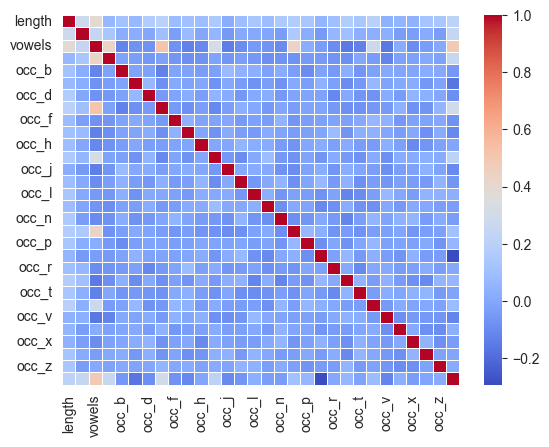

In [22]:
plt.figure();
sns.heatmap(df[[
    "length", "time", "vowels",
    "occ_a", "occ_b", "occ_c", "occ_d", "occ_e", "occ_f", "occ_g", "occ_h", "occ_i", "occ_j", "occ_k", "occ_l", "occ_m", "occ_n", "occ_o",
    "occ_p", "occ_q", "occ_r", "occ_s", "occ_t", "occ_u", "occ_v", "occ_w", "occ_x", "occ_y", "occ_z",
    "best_score"
]].corr(), cmap="coolwarm", linewidths=0.5)
plt.savefig("Plots/correlation_matrix.pdf");

# Nonlinear Correlation

1. length
2. vowels
3. occ_J
4. occ_Q
5. occ_X
6. occ_Z

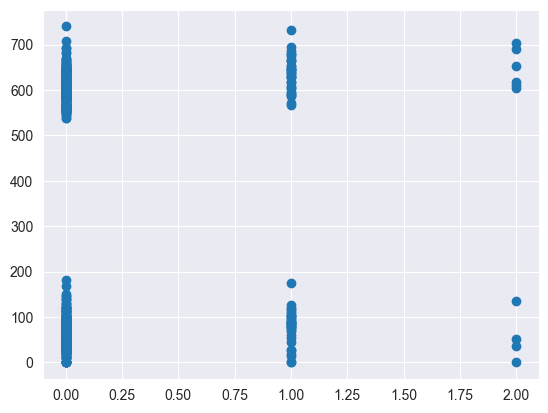

In [30]:
plt.figure();
plt.scatter(df["occ_z"], df["best_score"])

In [146]:
greedy = ['mijnheer',

'hairstreak',

'colluvial',

'bikinied',

'centralised',

'overbridged',

'atonality',

'hailstones',

'terneplate',

'plebiscites']

In [147]:
_ = []
for g in greedy:
    _.append(score_dict[g])
_

[184, 190, 261, 176, 231, 231, 171, 200, 170, 275]

In [148]:
np.mean(_)

208.9